In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [33]:
dataset = 'C:/Users/USER/Downloads/best-selling-game-consoles.csv'
df = pd.read_csv(dataset)
df

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN
5,PlayStation 4,Home,Sony,2013,0,117.20,NaN
6,PlayStation,Home,Sony,1994,2006,102.49,NaN
7,Wii,Home,Nintendo,2006,2013,101.63,NaN
8,PlayStation 3,Home,Sony,2006,2017,87.40,Final sales are greater than 87.4 million
9,Xbox 360,Home,Microsoft,2005,2016,84.00,Final sales are greater than 84 million


In [4]:
 df['Type'] = df['Type'].astype(object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released Year         51 non-null     int64  
 4   Discontinuation Year  51 non-null     int64  
 5   Units sold (million)  51 non-null     float64
 6   Remarks               16 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.1+ KB


In [6]:
df.describe()

,Released Year,Discontinuation Year,Units sold (million)
count,51.000000,51.000000,51.000000
mean,1996.058824,1844.803922,35.549412
std,12.378064,543.657319,42.608844
min,1976.000000,0.000000,1.000000
25%,1987.500000,1992.000000,3.200000
50%,1994.000000,1998.000000,13.560000
75%,2004.500000,2011.500000,60.205000
max,2020.000000,2020.000000,155.000000


In [7]:
# check number data have missing value
df.isna().sum().sort_values()

Console Name             0
Type                     0
Company                  0
Released Year            0
Discontinuation Year     0
Units sold (million)     0
Remarks                 35
dtype: int64

"Remarks" column get the bigger point, so i decide to drop it.

In [8]:
df.drop(columns="Remarks", inplace=True)

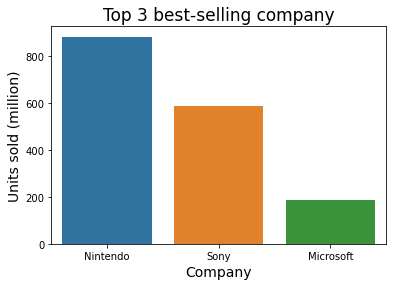

In [10]:
total_units_sold = df.groupby("Company")['Units sold (million)'].sum().reset_index()

top_3_company = total_units_sold.sort_values("Units sold (million)", ascending=False).head(3)

sns.barplot(data=top_3_company, x='Company', y='Units sold (million)')
plt.title('Top 3 best-selling company', fontsize=17)
plt.xlabel('Company', fontsize=14)
plt.ylabel("Units sold (million)", fontsize=14)
plt.show()

although sony company launch new console game in 2020 and now still available, nintendo's company still in higher selling position.
it means nintendo, have best satisfation to customer yeah, even a several console game in thats company is discontinued.

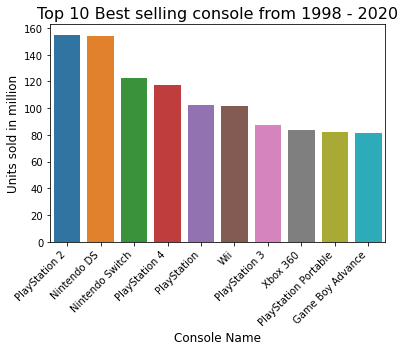

In [12]:
top10_console = df.sort_values('Units sold (million)',ascending=False).head(10)
    
sns.barplot(data=top10_console, x='Console Name', y='Units sold (million)')
plt.title("Top 10 Best selling console from 1998 - 2020", fontsize=16)
plt.xlabel("Console Name",fontsize=12)
plt.ylabel("Units sold in million", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
df.describe()

,Released Year,Discontinuation Year,Units sold (million)
count,51.000000,51.000000,51.000000
mean,1996.058824,1844.803922,35.549412
std,12.378064,543.657319,42.608844
min,1976.000000,0.000000,1.000000
25%,1987.500000,1992.000000,3.200000
50%,1994.000000,1998.000000,13.560000
75%,2004.500000,2011.500000,60.205000
max,2020.000000,2020.000000,155.000000


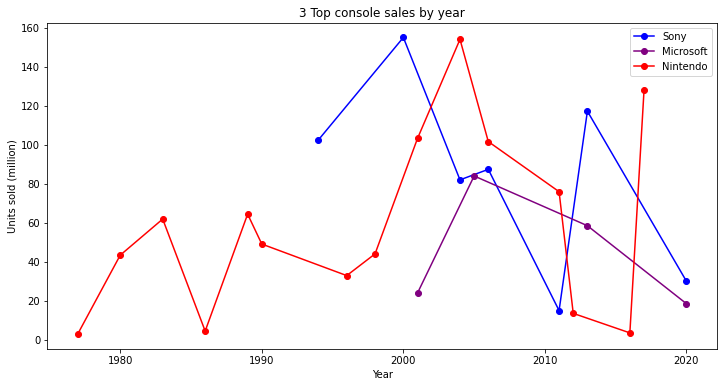

In [14]:
# BAGIAN INI DISKIP KARENA UDAH DI VISUALISASIIN DALAM BENTUK PIE CHART
# BAGIAN INI OPTIONAL AJA
sony_df = df[df['Company'] == 'Sony']
units_sold_sny = sony_df.groupby('Released Year')['Units sold (million)'].sum()
micro_df = df[df['Company'] == 'Microsoft']
units_sold_mcs = micro_df.groupby('Released Year')['Units sold (million)'].sum()
nintendo_df = df[df['Company'] == 'Nintendo']
units_sold_by_year = nintendo_df.groupby('Released Year')['Units sold (million)'].sum()

plt.figure(figsize=(12, 6))
plt.plot(units_sold_sny.index, units_sold_sny.values, '-o', color='blue')
plt.plot(units_sold_mcs.index, units_sold_mcs.values, '-o', color='purple')
plt.plot(units_sold_by_year.index, units_sold_by_year.values, '-o', color ='red')

plt.xlabel('Year')
plt.ylabel('Units sold (million)')
plt.title('3 Top console sales by year')
plt.legend(labels=['Sony','Microsoft','Nintendo'])
plt.show()


In [15]:
# NUNJUKKIN 3 PERUSAHAAN CONSOL GAME YANG PRODUKNYA MASIH BERJALAN 
df[['Console Name','Released Year','Discontinuation Year']]
df.loc[[2,5,19,23]]

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million)
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55
5,PlayStation 4,Home,Sony,2013,0,117.20
19,PlayStation 5,Home,Sony,2020,0,30.00
23,Xbox Series X/S,Home,Microsoft,2020,0,18.50


In [18]:
total_units_sold = df.groupby("Type")['Console Name'].count().reset_index()
total_units_sold

,Type,Console Name
0,Dedicated,4
1,Handheld,12
2,Home,31
3,Home console add-on,3
4,Hybrid,1


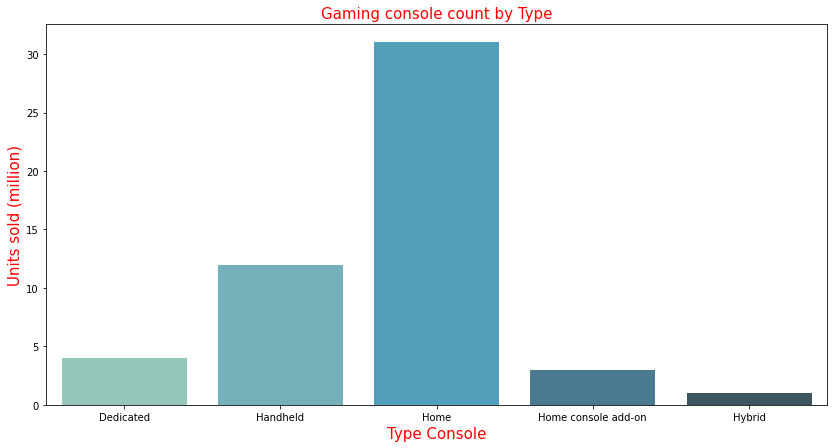

In [19]:
plt.figure(figsize=(14, 7))
ax3 = sns.barplot(data=total_units_sold, x='Type', y='Console Name', palette='GnBu_d')
plt.xlabel('Type Console', fontdict = {'fontname':'sans-serif','color':'red','fontsize':'15'})
plt.ylabel('Units sold (million)', fontdict = {'fontname':'sans-serif','color':'red','fontsize':'15'})
plt.title('Gaming console count by Type', fontdict = {'fontname':'sans-serif','color':'red','fontsize':'15'})
plt.savefig('CountType', dpi=300);

In [23]:
type_in_company = df.groupby("Company")['Type'].count().reset_index()
type_in_company 


,Company,Type
0,Atari,4
1,Bandai,1
2,Coleco,2
3,Magnavox/Philips,1
4,Mattel,1
5,Micro Genius,1
6,Microsoft,4
7,NEC,1
8,NEC/Hudson Soft[note 6],1
9,Nintendo,17


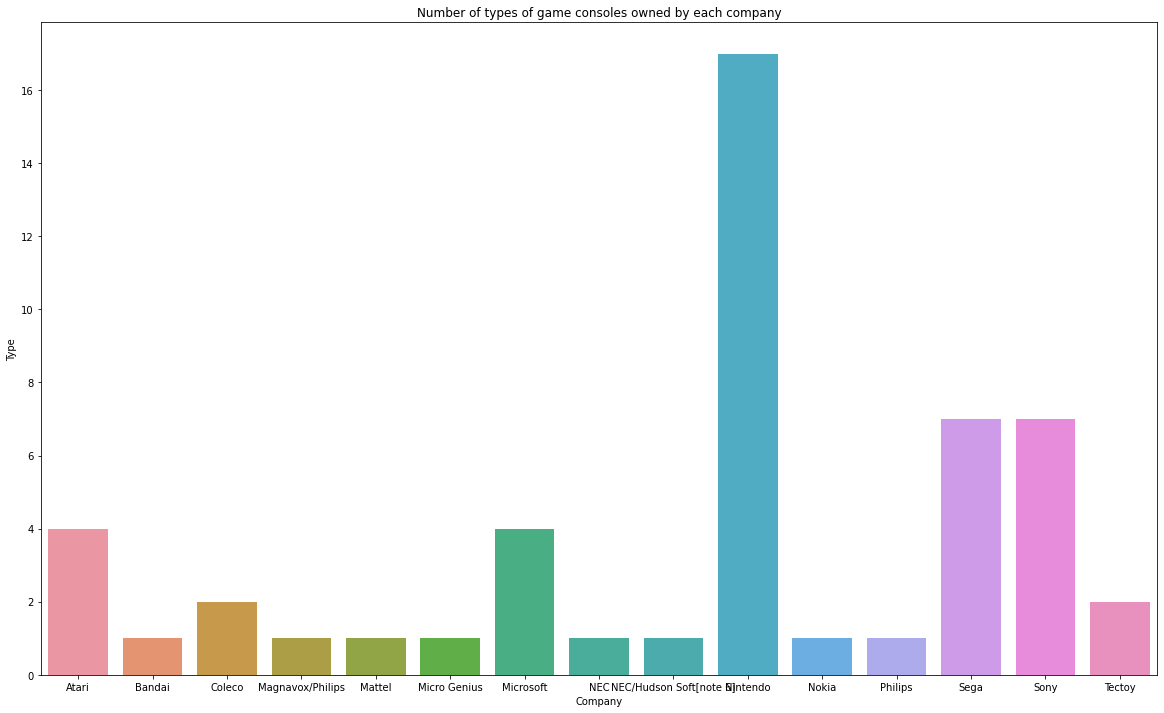

In [24]:
plt.figure(figsize=(20, 12))
sns.barplot(data=type_in_company, x='Company', y='Type')
plt.title("Number of types of game consoles owned by each company")
plt.xlabel('Company')
plt.ylabel('Type')
plt.show()

Text(0, 0.5, 'Units sold (million)')

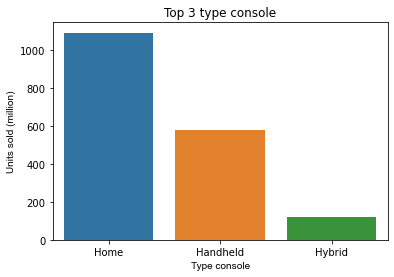

In [21]:
total_units_sold = df.groupby("Type")['Units sold (million)'].sum().reset_index()

top_3_Type = total_units_sold.sort_values("Units sold (million)", ascending=False).head(3)
sns.barplot(data=top_3_Type, x='Type', y='Units sold (million)')
plt.title("Top 3 type console")
plt.xlabel('Type console', fontname='Arial')
plt.ylabel('Units sold (million)', fontname='Arial')

In [31]:
 df['Units sold (million)'].sum()

1813.02

In [ ]:
181302.1